### Has the network latency gone up since we switched internet service providers?

    - Null hypothesis: Network latency has not changed since switching ISPs. Bandwidth and the network's efficiency in using it are the same. The network crashes at the same rate as it did before; upload and download speeds have not changed.

    - Alternative hypothesis: Network latency has changed since switching ISPs. Bandwidth has either increased or decreased, and the network's efficiency in using it has either increased or decreased. The network crashes either less than it did before or more than it did before; upload and download speeds have either increased or decreased.

    * True positive: Null hypothesis ("Network latency has not changed...") was rejected and it was found that, by the above mentioned criteria, network latency has changed. Bandwidth increased (or decreased), the network's efficiency in using available bandwidth increased (or decreased), the network crashes less(or more) than it did before the ISP switch, and/or upload and download speeds are faster (or slower).

    * True negative: Null hypothesis was accepted and no change was found in network latency. All conditions with regard to network latency remain the same as before the ISP switch.

    * False positive: Null hypothesis was rejected, but there was no actual change in network latency.
    * False negative: Null hypothesis was accepted, but there was real change in network latency.


### Is the website redesign any good?

    - Null hypothesis: There has been no noticeable change in the website's performance since its redesign. UX ratings are the same as before the redesign. The number of catastrophic errors remains the same. The site's traffic has not increased.

    - Alternative hypothesis: The website is performing better since its redesign. UX ratings are higher. The number of catastrophic errors has decreased. Site traffic has significantly increased.

        * True positive: Null hypothesis rejected. Website redesigned deemed good based on noted improvement in above mentioned criteria.
        * True negative: Null hypothesis accepted. No notable change in the website's performance since its redesign.
            ** (What if website performance is worse since redesign???)
        * False positive: Null hypothesis rejected, but website performance remains the same (or worse).
        * False negative: Null hypothesis accepted, but website performance has improved.

### Is our television ad driving more sales?
   
    - Null hypothesis: Sales have remained the same since the release of the TV ad. There has been no ROI.
    - Alternative hypothesis: Sales have either increased or decreased since the release of the TV ad. There is either a significant, positive ROI or a net loss in revenue directly associable with the release of the ad.
        * True positive: Null hypothesis rejected and notable increase or decrease in sales, reflected in net gain or loss in revenue subsequent to release of ad.
        * True negative: Null hypothesis accepted. No change in sales noted; no ROI.
        * False positive: Null hypothesis rejected, but no change in sales and 0 ROI.
        * False negative: Null hypothesis accepted, but increase or decrease in sales noted. Net gain or loss in revenue since release of ad.

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from pydataset import data
from env import get_db_url

np.random.seed(123)


<BarContainer object of 100 artists>

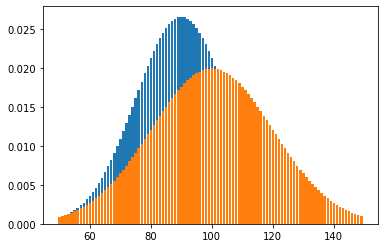

In [64]:
office_one_sales = 40
office_one_avg = 90
office_one_std = 15
office_two_sales = 50
office_two_avg = 100
office_two_std = 20

x = np.arange(50,150)

ofc_one_selltime = stats.norm(office_one_avg, office_one_std).pdf(x)
ofc_two_selltime = stats.norm(office_two_avg, office_two_std).pdf(x)

# H0: There is no difference between the average sales times of office 1 and office 2
# Ha: Office 1's sales time is not equal Office 2's sales time. 

plt.bar(x, ofc_one_selltime)
plt.bar(x, ofc_two_selltime)
plt.xlabel('Sell time')
plt.ylabel('Freq %')

In [ ]:
ofc1_df = pd.DataFrame(stats.norm(office_one_avg, office_one_std).rvs(1000))
ofc2_df = pd.DataFrame(stats.norm(office_two_avg, office_two_std).rvs(1000))

In [67]:
alpha = 0.05

tsat, pval = stats.ttest_1samp()


ValueError: DataFrame constructor not properly called!

### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Are compact cars more fuel-efficient than the average car?

- Do manual cars get better gas mileage than automatic cars?

In [32]:
mpg = data('mpg')

In [74]:
mpg.head()
mpg['avg_mileage'] = (mpg.hwy + mpg.cty) / 2

cars_2008 = mpg[mpg.year == 2008]
cars_1999 = mpg[mpg.year == 1999]

mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [76]:
fuel_eff_2008 = cars_2008.avg_mileage.mean()
fuel_eff_1999 = cars_1999.avg_mileage.mean()

print(f'2008 average fuel efficiency is {fuel_eff_2008}.')
print(f'1999 average fuel efficiency is {fuel_eff_1999}.')

2008 average fuel efficiency is 20.076923076923077.
1999 average fuel efficiency is 20.22222222222222.


H0: There is no difference in fuel efficiency between cars in 2008 and 1999.

Ha: Fuel efficiency in 2008 cars > Fuel efficiency in 1999 cars.

In [85]:
cars_2008.avg_mileage.var()
cars_1999.avg_mileage.var()
alpha = 0.05
tstat, pval = stats.ttest_ind(cars_2008.avg_mileage, cars_1999.avg_mileage, equal_var=False)

tstat, pval / 2, alpha


(-0.21960177245940962, 0.4131875386030319, 0.05)

In [86]:
if pval / 2 < alpha and tstat > 0:
    print ('We reject the null hypothesis.')
else:
    print ('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


In [88]:
mpg.rename(columns= {'class': 'car_class'}, inplace= True)
mpg.head()

compact_cars = mpg[mpg.car_class == 'compact']

H0: There is no difference between compact car fuel efficiency and average car fuel efficiency

Ha: Compact car fuel efficiency > average car fuel efficiency

In [90]:

print(f'Average compact car fuel efficiency: {compact_cars.avg_mileage.mean()}')
print(f'Average car fuel efficiency: {mpg.avg_mileage.mean()}')


Average compact car fuel efficiency: 24.21276595744681
Average car fuel efficiency: 20.14957264957265
Is variance equal? False


In [96]:
alpha = 0.05

tstat, pval = stats.ttest_1samp(compact_cars.avg_mileage, mpg.avg_mileage.mean())

if pval / 2 < alpha and tstat > 0:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


In [ ]:
auto_trans_car = 